<a href="https://colab.research.google.com/github/OscarBedford/MLCourse_Weekly_Exercises/blob/main/Exercise4_8_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.6 MB 4.9 MB/s 


In [ ]:
import numpy as np
from nilearn import datasets
from nilearn.input_data import NiftiLabelsMasker
from nilearn.image import index_img
from sklearn.preprocessing import StandardScaler
import nibabel as nib
brain_data = datasets.fetch_oasis_vbm(n_subjects=100)
crad = datasets.fetch_atlas_craddock_2012()
atlas_nii = index_img(crad['scorr_mean'], 42) # We will fix this value to atlas 43 (index 42)
print('%i regions found in this atlas' %
(len(np.unique(atlas_nii.get_data().ravel())) - 1))
masker = NiftiLabelsMasker(labels_img= atlas_nii, standardize=True)
input_variables = masker.fit_transform(brain_data.gray_matter_maps)
output_variable = StandardScaler().fit_transform(brain_data.ext_vars.age[:, None])[:,0] # gives subject age on standard units after z-scoring

/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)



Dataset created in /root/nilearn_data/craddock_2012



 ...done. (0 seconds, 0 min)
Extracting data from /root/nilearn_data/craddock_2012/64ec9dc239add5cb58c7248a4136b852/craddock_2011_parcellations.tar.gz..... done.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  # This is added back by InteractiveShellApp.init_path()


788 regions found in this atlas


In [ ]:
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import pandas as pd

In [ ]:
clf = GridSearchCV(Lasso(max_iter=1e4), {
          'alpha' : np.linspace(0.1,1,10) # We want a grid raning from alpha = 0.1 to alpha = 1 in 10 evenly-spaced steps
}, cv = 10)

X, y = input_variables, output_variable
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

clf.fit(X_train, y_train)
clf.cv_results_

{'mean_fit_time': array([0.01324658, 0.01642792, 0.01123655, 0.01343348, 0.01141779,
        0.00827394, 0.00533404, 0.00276833, 0.00272455, 0.00651836]),
 'std_fit_time': array([0.00652989, 0.00428556, 0.00417579, 0.00380627, 0.00362795,
        0.0058424 , 0.00200314, 0.00090271, 0.00078674, 0.00793407]),
 'mean_score_time': array([0.00124888, 0.00184715, 0.00094562, 0.00115235, 0.00102799,
        0.00141625, 0.00105457, 0.0008513 , 0.00086541, 0.00091715]),
 'std_score_time': array([5.94323422e-04, 2.19795533e-03, 5.35690842e-05, 3.12492387e-04,
        1.08679131e-04, 1.14472229e-03, 4.46463484e-04, 2.11450754e-04,
        1.41128768e-04, 1.63049298e-04]),
 'param_alpha': masked_array(data=[0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6,
                    0.7000000000000001, 0.8, 0.9, 1.0],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.1},
  

In [ ]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013247,0.006530,0.001249,0.000594,0.1,{'alpha': 0.1},0.684422,0.732901,0.515627,0.622758,0.274503,0.724716,0.594113,0.292633,0.373697,0.651145,0.546652,0.165471,1
1,0.016428,0.004286,0.001847,0.002198,0.2,{'alpha': 0.2},0.478245,0.615766,0.431011,0.370571,0.172301,0.667450,0.483189,0.205051,0.283960,0.606799,0.431434,0.164060,2
2,0.011237,0.004176,0.000946,0.000054,0.3,{'alpha': 0.30000000000000004},0.324452,0.503736,0.314526,0.125234,0.105976,0.580717,0.424185,0.169976,0.258083,0.613624,0.342051,0.174376,3
3,0.013433,0.003806,0.001152,0.000312,0.4,{'alpha': 0.4},0.178458,0.372224,0.161453,-0.125841,0.107772,0.409503,0.297192,0.111952,0.236723,0.509021,0.225846,0.172494,4
4,0.011418,0.003628,0.001028,0.000109,0.5,{'alpha': 0.5},0.025618,0.262059,0.061588,-0.348441,0.099074,0.288611,0.166178,0.037215,0.148390,0.349466,0.108976,0.184942,5
5,0.008274,0.005842,0.001416,0.001145,0.6,{'alpha': 0.6},-0.194079,0.142265,-0.055502,-0.595469,0.032000,0.168972,0.032661,-0.122864,0.080992,0.137116,-0.037391,0.217414,6
6,0.005334,0.002003,0.001055,0.000446,0.7,{'alpha': 0.7000000000000001},-0.414077,0.013861,-0.163025,-0.817878,-0.055433,0.031777,-0.122655,-0.347944,-0.004130,-0.057407,-0.193691,0.252090,7
7,0.002768,0.000903,0.000851,0.000211,0.8,{'alpha': 0.8},-0.414077,-0.008431,-0.211344,-0.817878,-0.108129,-0.008391,-0.135544,-0.425438,-0.046474,-0.057407,-0.223311,0.245567,8
8,0.002725,0.000787,0.000865,0.000141,0.9,{'alpha': 0.9},-0.414077,-0.008431,-0.211344,-0.817878,-0.108129,-0.008391,-0.135544,-0.425438,-0.046474,-0.057407,-0.223311,0.245567,8
9,0.006518,0.007934,0.000917,0.000163,1.0,{'alpha': 1.0},-0.414077,-0.008431,-0.211344,-0.817878,-0.108129,-0.008391,-0.135544,-0.425438,-0.046474,-0.057407,-0.223311,0.245567,8


In [ ]:
alpha_values = df.param_alpha
coefs = []

In [ ]:
for x in alpha_values:
      brain_data = datasets.fetch_oasis_vbm(n_subjects=100)
      crad = datasets.fetch_atlas_craddock_2012()
      atlas_nii = index_img(crad['scorr_mean'], 42) # We fix this at index 42
      print('%i regions found in this atlas' %
      (len(np.unique(atlas_nii.get_data().ravel())) - 1))
      masker = NiftiLabelsMasker(labels_img= atlas_nii, standardize=True)
      input_variables = masker.fit_transform(brain_data.gray_matter_maps)
      output_variable = StandardScaler().fit_transform(brain_data.ext_vars.age[:, None])[:,0] # gives subject age on standard units after z-scoring

      lasso = Lasso(alpha=(x), max_iter=1e4)

      X, y = input_variables, output_variable
      X_scaled = scaler.fit_transform(X)
      X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

      LassoReg = lasso.fit(X_train,y_train) # We fit the lasso training model
      coefs.append(LassoReg.coef_) 

/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


788 regions found in this atlas


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


788 regions found in this atlas


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


788 regions found in this atlas


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


788 regions found in this atlas


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


788 regions found in this atlas


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


788 regions found in this atlas


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


788 regions found in this atlas


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


788 regions found in this atlas


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


788 regions found in this atlas


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


788 regions found in this atlas


In [ ]:
coefs = np.squeeze(coefs)

In [ ]:
nums = list(range(0,10))
for x in nums:
    l = np.count_nonzero(coefs[x]==0)
    print(l)

765
774
781
783
786
786
787
788
788
788


In this case, we go from 788 zeroed out input variables when alpha is 1 (bottom), to 765 zeroed out input variables when it is 0.1 (top). Let's see how the regularization path for the 23 variables that survive alpha = 0.1 

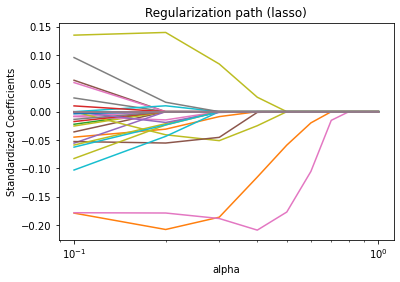

In [ ]:
ax = plt.gca()

ax.plot(alpha_values, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Regularization path (lasso)');

As with exercise 4.3, when alpha starts decreasing from 1 towards 0.1, we start seeing the shrinkage of a couple of variables surface. Interestingly, we soon get a positive weighting for one of the variables (limegreen color). It would be advantageous to know the name of that feature, in a real-world setting.